# Solving a simple Problem with Neural Network

In [1]:
##importing the main deep learning 
import tensorflow as tf
from tensorflow import keras

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", keras.__version__)


Tensorflow Version:  2.3.0
Keras Version:  2.4.0


In [54]:
import numpy as np

In [4]:
bedrooms = np.array([2,3,4,5,6,7])
house_prices = np.array([150, 200, 250, 300, 350, 400])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(bedrooms, house_prices, epochs=100)

print(model.predict([10]))


Epoch 1/100
1/1 [==============================] - 0s 701us/step - loss: 81722.0234
Epoch 2/100
1/1 [==============================] - 0s 350us/step - loss: 22158.4395
Epoch 3/100
1/1 [==============================] - 0s 375us/step - loss: 6107.9370
Epoch 4/100
1/1 [==============================] - 0s 350us/step - loss: 1782.3517
Epoch 5/100
1/1 [==============================] - 0s 437us/step - loss: 616.1293
Epoch 6/100
1/1 [==============================] - 0s 426us/step - loss: 301.2243
Epoch 7/100
1/1 [==============================] - 0s 469us/step - loss: 215.7156
Epoch 8/100
1/1 [==============================] - 0s 474us/step - loss: 192.0225
Epoch 9/100
1/1 [==============================] - 0s 877us/step - loss: 184.9894
Epoch 10/100
1/1 [==============================] - 0s 545us/step - loss: 182.4487
Epoch 11/100
1/1 [==============================] - 0s 520us/step - loss: 181.1214
Epoch 12/100
1/1 [==============================] - 0s 627us/step - loss: 180.1243
Epoch 1


# Image Classification on Fashion MNIST dataset


In [2]:
##loading fashion MNIST dataset from tensorflow data API
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


<module 'tensorflow.keras.datasets.fashion_mnist' from '/home/harshit/DSWH/dswh_env/lib/python3.8/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[1]

0

## Creating a validation set from the training set

* Reserving first 5000 rows images for validation set.
* Since we'll be training the neural network using gradient descent, we must scale the input features, i.e. we'll scale the intensities down to 0-1 range by dividing them by 255.0

In [47]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.0

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[1]]

'T-shirt/top'

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline

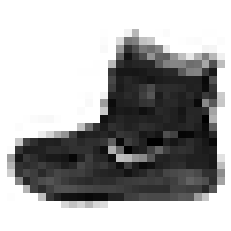

In [20]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

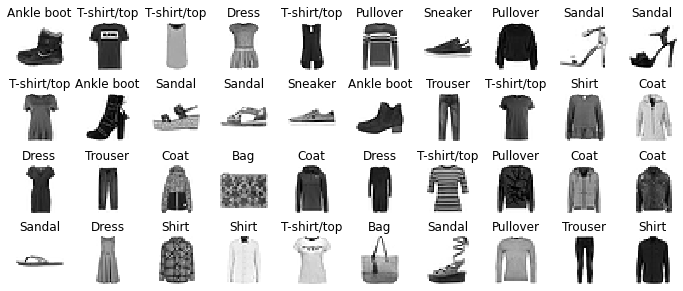

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Defining Model with 2 Hidden Layer using Sequential API

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # input flatten layer
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # output layer
])


In [24]:
model.layers

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [38]:
hidden_1 = model.layers[1]

In [39]:
hidden_1.name

'dense'

In [40]:
## learning weights and biases
weights, biases = hidden_1.get_weights()

In [41]:
weights

array([[ 0.03180294, -0.03280068,  0.00492309, ..., -0.05851386,
         0.03755169, -0.00541918],
       [-0.05827887,  0.050328  , -0.04670989, ..., -0.00641058,
         0.02874739,  0.06118342],
       [-0.006658  ,  0.05581377, -0.04039989, ..., -0.02241705,
         0.00018178,  0.05428068],
       ...,
       [ 0.06301776, -0.0497018 ,  0.01431972, ..., -0.03671221,
         0.01287489,  0.02149443],
       [ 0.02115034, -0.00462861, -0.06134637, ..., -0.01771066,
        -0.01065635, -0.0152724 ],
       [ 0.01141623,  0.00428621,  0.04291796, ...,  0.01292004,
        -0.06635474,  0.07050899]], dtype=float32)

In [42]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

## Compiling the model

1. **Loss**: we use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive.
2. **Optimizer**: "sgd" means that we will train the model using simple Stochastic Gradient Descent. Bsically, Keras will perform the backpropagation algorithm as discussed.
3. **Metrics**: Since this is a classification problem, it'd be useful to measure the accuracy of the model.

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [48]:
 history = model.fit(X_train, y_train, epochs=30, 
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7198 - accuracy: 0.7645 - val_loss: 0.5518 - val_accuracy: 0.8010
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4890 - accuracy: 0.8300 - val_loss: 0.4410 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4425 - accuracy: 0.8459 - val_loss: 0.4194 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4147 - accuracy: 0.8538 - val_loss: 0.4020 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 2s 998us/step - loss: 0.3946 - accuracy: 0.8617 - val_loss: 0.4189 - val_accuracy: 0.8530
Epoch 6/30
1719/1719 [==============================] - 2s 996us/step - loss: 0.3782 - accuracy: 0.8670 - val_loss: 0.3692 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3633 - accuracy: 0.8705 - val_loss: 0.3695 - val_accur

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 543us/step - loss: 0.3251 - accuracy: 0.8818


[0.32513371109962463, 0.8817999958992004]

## Making a few predictions

In [50]:
X_sample = X_test[:5]
y_proba = model.predict(X_sample)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.16, 0.  , 0.01, 0.  , 0.01, 0.  , 0.82, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [52]:
y_pred = model.predict_classes(X_sample)
y_pred

array([9, 2, 1, 1, 6])

In [56]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [60]:
y_sample = y_test[:5]
np.array(class_names)[y_sample]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')